In [1]:
#Importando a biblioteca pandas
import pandas as pd

In [3]:
#Lendo a base de dados
df = pd.read_excel("planilha_vendas.xlsx")

In [4]:
#Exibindo as 5 primeiras linhas 
df.head()

,Cidade ID,Data,Vendas,LojaID,Qtde
0,22.0,2014-01-02,127.92,1036.0,1
1,22.0,2014-01-02,30.97,1036.0,1
2,22.0,2014-01-02,39.29,1036.0,1
3,22.0,2014-01-02,158.66,1036.0,1
4,22.0,2014-01-02,242.31,1036.0,1


## Nesse caso, o método utilizado foi o read_excel, já que estamos trabalhando com uma planilha do Excel, então, já temos nosso dataset carregado e já visualizamos as 5 primeiras linhas com o método head(). Vamos começar?

### Para começar vamos alterar o tipo da coluna LojaID para string, como podem perceber ela está vindo como float, mas, como não iremos utilizar essa coluna para cálculos, transformaremos essa coluna em uma string, segue o código:

In [4]:
df["LojaID"] = df["LojaID"].astype(str)

In [5]:
df.head()

,Cidade ID,Data,Vendas,LojaID,Qtde
0,22.0,41641,127.92,1036.0,1
1,22.0,41641,30.97,1036.0,1
2,22.0,41641,39.29,1036.0,1
3,22.0,41641,158.66,1036.0,1
4,22.0,41641,242.31,1036.0,1


### Pronto, agora já temos LojaID como string, e como temos certeza disso? basta utilizar o df.dtypes como mostrado abaixo:

In [6]:
df.dtypes

Cidade ID    float64
Data           int64
Vendas       float64
LojaID        object
Qtde           int64
dtype: object

### Agora vou mostrar como adicionar uma nova coluna em nosso dataset, vocês já devem ter observado que temos uma coluna de venda e uma coluna de quantidade, então para retornar a receita vamos multiplicar vendas por quantidade, vamos lá?

In [7]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [8]:
#Exibindo as 5 últimas linhas
df.tail()

,Cidade ID,Data,Vendas,LojaID,Qtde,Receita
507,26.0,41640,15.62,1037,2,31.24
508,26.0,41640,13.41,1037,7,93.87
509,26.0,41640,33.12,1037,9,298.08
510,26.0,41640,37.49,1037,2,74.98
511,26.0,41640,13.70,1037,6,82.20


###  Agora vamos tratar valores faltantes, e como descubro se tem algum dado missing em meu dataset? fácil também, olha só:

In [9]:
df.isnull().sum()

Cidade ID    2
Data         0
Vendas       0
LojaID       4
Qtde         0
Receita      0
dtype: int64

### Temos 2 linhas com valores nulos e eles referem-se a coluna Cidade ID, ou seja, alguém esqueceu de preencher o ID da Cidade em 2 vendas realizadas, Fernanda, podemos apagar essas linhas do nosso dataset? podemos sim:

In [12]:
df.dropna(inplace=True) #O parâmetro inplace define que a alteração irá modificar o objeto em memória.

In [13]:
#Verificando novamente os valores faltantes
df.isnull().sum()

Cidade ID    0
Data         0
Vendas       0
LojaID       0
Qtde         0
Receita      0
dtype: int64

### Como podemos retornar a venda de maior receita receita?

In [14]:
df.max()

Cidade ID       26.00
Data         41792.00
Vendas         244.83
LojaID        1037.00
Qtde            10.00
Receita       1913.36
dtype: float64

### E a venda de menor receita?

In [15]:
df.min()

Cidade ID        7.00
Data         41640.00
Vendas           3.01
LojaID        1035.00
Qtde             1.00
Receita          3.34
dtype: float64

### Também podemos utilizar os métodos nlargest e nsmallest para retornar por exemplo as 3 vendas com as maiores receitas ou as 3 vendas com as menores, como mostrado logo abaixo:

In [17]:
#Top 3 de vendas com base na Receita
df.nlargest(3, "Receita")

,Cidade ID,Data,Vendas,LojaID,Qtde,Receita
286,7.0,41792,239.17,1037,8,1913.36
423,26.0,41640,229.64,1037,8,1837.12
476,26.0,41640,198.24,1037,9,1784.16


In [18]:
#Bottom 3 de vendas com base na Receita
df.nsmallest(3, "Receita")

,Cidade ID,Data,Vendas,LojaID,Qtde,Receita
500,26.0,41640,3.34,1037,1,3.34
305,7.0,41792,4.01,1037,1,4.01
27,22.0,41641,4.57,1037,1,4.57


### Agora vamos realizar um agrupamento para ver como estão as vendas de cada loja:

In [19]:
df.groupby("LojaID")["Receita"].sum()

LojaID
1035.0       424.85
1036.0     19271.94
1037.0    121058.24
Name: Receita, dtype: float64

### Agora, vamos conhecer o método sort_values() para ordenar o nosso dataset pela coluna Receita em ordem decrescente:

In [20]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade ID,Data,Vendas,LojaID,Qtde,Receita
286,7.0,41792,239.17,1037,8,1913.36
423,26.0,41640,229.64,1037,8,1837.12
476,26.0,41640,198.24,1037,9,1784.16
405,26.0,41640,237.50,1037,7,1662.50
413,26.0,41640,171.16,1037,9,1540.44
381,7.0,41792,182.75,1037,8,1462.00
399,26.0,41640,162.19,1037,9,1459.71
457,26.0,41640,160.64,1037,9,1445.76
259,7.0,41792,199.43,1037,7,1396.01
460,26.0,41640,154.85,1037,9,1393.65


### Fernanda, finalizei minha análise, preciso gerar uma nova planilha, como faço? Para isso iremos utilizar o método df.to_excel e passar como parâmetro o nome da nova planilha e se queremos salvar com o index ou não, veja como é fácil:

In [21]:
df.to_excel("Nova_Planilha_Vendas.xlsx", index=False)

### Pronto, se olhar em seu diretório do Jupyter notebook sua nova planilha já estará lá, pronta para ser utilizada, e você pode fazer Download e utilizar em uma ferramenta de visualização de dados, como por exemplo, o Power BI.

## Gráfico Receita pro Loja ID

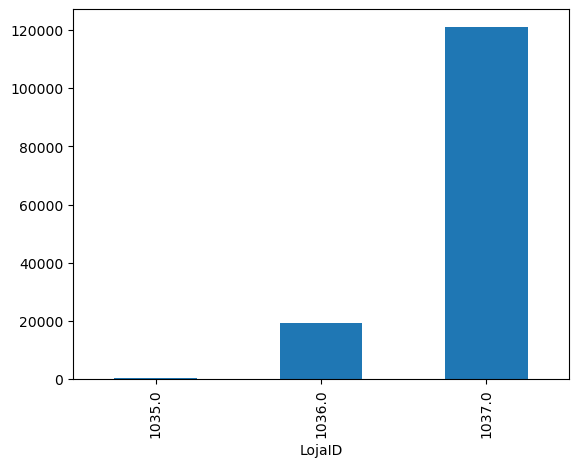

In [9]:
df.groupby("LojaID")["Receita"].sum().plot.bar();